In [7]:
import pandas as pd

users = pd.read_csv('../data/users_data.csv')
activities_daily = pd.read_csv('../data/user_activity_daily.csv')
churn_status = pd.read_csv('../data/churn_status.csv')

In [8]:
users.head()

,user_id,age,gender,signup_date,subscription_type,payment_method,monthly_revenue,country,referral_source,has_kids,last_payment_date
0,1000,39,M,2025-02-22,Basic,Credit Card,9.99,ME,Facebook,1,2025-04-10
1,1001,33,F,2024-10-19,Basic,PayPal,9.99,AO,Facebook,0,2025-01-29
2,1002,32,M,2025-03-24,Premium,Credit Card,14.99,SO,Google,0,2025-05-12
3,1003,32,F,2024-01-20,Premium,Credit Card,14.99,GM,Google,1,2024-03-26
4,1004,50,F,2025-06-26,Premium,Credit Card,14.99,SL,Facebook,0,2025-06-26


In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            10000 non-null  int64  
 1   age                10000 non-null  int64  
 2   gender             9504 non-null   object 
 3   signup_date        10000 non-null  object 
 4   subscription_type  10000 non-null  object 
 5   payment_method     10000 non-null  object 
 6   monthly_revenue    10000 non-null  float64
 7   country            9949 non-null   object 
 8   referral_source    9043 non-null   object 
 9   has_kids           10000 non-null  int64  
 10  last_payment_date  10000 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 859.5+ KB


In [10]:
churn_status.head()

,user_id,churn_status,churn_date,reason,feedback_score
0,1000,0,NaN,NaN,3.0
1,1001,0,NaN,NaN,5.0
2,1002,1,2025-05-30,Price,4.0
3,1003,1,2024-04-10,Price,1.0
4,1004,0,NaN,NaN,5.0


In [11]:
churn_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         10000 non-null  int64  
 1   churn_status    10000 non-null  int64  
 2   churn_date      2985 non-null   object 
 3   reason          3070 non-null   object 
 4   feedback_score  8984 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 390.8+ KB


In [12]:
activities_daily.head()

,date,user_id,sessions,minutes_watched,content_type,buffering_events,error_occurred
0,2025-06-02,1000,1,36,TV Show,0,0
1,2025-06-03,1000,0,57,Movie,0,1
2,2025-06-04,1000,1,33,Live,0,0
3,2025-06-05,1000,1,41,Live,0,0
4,2025-06-06,1000,0,27,Movie,0,0


In [13]:
activities_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              30000 non-null  object
 1   user_id           30000 non-null  int64 
 2   sessions          30000 non-null  int64 
 3   minutes_watched   30000 non-null  int64 
 4   content_type      25636 non-null  object
 5   buffering_events  30000 non-null  int64 
 6   error_occurred    30000 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.6+ MB


### Assessing data for null values or inconsistencies

#### Users

In [14]:
# Check for duplicated user_id in users dataframe
duplicated_users = users[users.duplicated('user_id', keep=False)]
duplicated_users

,user_id,age,gender,signup_date,subscription_type,payment_method,monthly_revenue,country,referral_source,has_kids,last_payment_date


In [15]:
def check_null_percentage(df, column=None):
    """
        Checks the percentage of null values in a DataFrame or a specific column.
    """
    null_percentage = df.isnull().mean() * 100

    return null_percentage[null_percentage > 0]

In [16]:
check_null_percentage(users)

gender             4.96
country            0.51
referral_source    9.57
dtype: float64

So, about 5% of gender, and 10% of referral_source are nulls.

Let's consider not a huge issue and keep going with these null data.

In [17]:
users.describe()

,user_id,age,monthly_revenue,has_kids
count,10000.00000,10000.000000,10000.000000,10000.000000
mean,5999.50000,34.892300,10.501511,0.294800
std,2886.89568,9.491865,5.693320,0.455976
min,1000.00000,18.000000,0.000000,0.000000
25%,3499.75000,28.000000,9.990000,0.000000
50%,5999.50000,35.000000,14.990000,0.000000
75%,8499.25000,41.000000,14.990000,1.000000
max,10999.00000,70.000000,14.990000,1.000000


In [18]:
users.describe(include='object')

,gender,signup_date,subscription_type,payment_method,country,referral_source,last_payment_date
count,9504,10000,10000,10000,9949,9043,10000
unique,3,731,3,3,194,4,681
top,F,2024-11-18,Premium,Credit Card,HU,Google,2025-07-08
freq,4524,27,5041,5928,69,3062,102


In [19]:
users.signup_date.min(), users.signup_date.max()

('2023-07-09', '2025-07-08')

In [20]:
users.last_payment_date.min(), users.last_payment_date.max()

('2023-07-15', '2025-07-08')

#### Churn status

In [21]:
churn_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         10000 non-null  int64  
 1   churn_status    10000 non-null  int64  
 2   churn_date      2985 non-null   object 
 3   reason          3070 non-null   object 
 4   feedback_score  8984 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 390.8+ KB


In [22]:
churn_status.describe(include='all')

,user_id,churn_status,churn_date,reason,feedback_score
count,10000.00000,10000.000000,2985,3070,8984.000000
unique,NaN,NaN,629,5,NaN
top,NaN,NaN,2025-07-05,Price,NaN
freq,NaN,NaN,30,1549,NaN
mean,5999.50000,0.307000,NaN,NaN,3.428651
std,2886.89568,0.461272,NaN,NaN,1.272171
min,1000.00000,0.000000,NaN,NaN,1.000000
25%,3499.75000,0.000000,NaN,NaN,3.000000
50%,5999.50000,0.000000,NaN,NaN,4.000000
75%,8499.25000,1.000000,NaN,NaN,4.000000


In [23]:
users_churn_status = pd.merge(users, churn_status, on='user_id')
users_churn_status.head()

,user_id,age,gender,signup_date,subscription_type,payment_method,monthly_revenue,country,referral_source,has_kids,last_payment_date,churn_status,churn_date,reason,feedback_score
0,1000,39,M,2025-02-22,Basic,Credit Card,9.99,ME,Facebook,1,2025-04-10,0,NaN,NaN,3.0
1,1001,33,F,2024-10-19,Basic,PayPal,9.99,AO,Facebook,0,2025-01-29,0,NaN,NaN,5.0
2,1002,32,M,2025-03-24,Premium,Credit Card,14.99,SO,Google,0,2025-05-12,1,2025-05-30,Price,4.0
3,1003,32,F,2024-01-20,Premium,Credit Card,14.99,GM,Google,1,2024-03-26,1,2024-04-10,Price,1.0
4,1004,50,F,2025-06-26,Premium,Credit Card,14.99,SL,Facebook,0,2025-06-26,0,NaN,NaN,5.0


In [24]:
churn_date_issue = users_churn_status.loc[users_churn_status.churn_date < users_churn_status.signup_date]
churn_date_issue

,user_id,age,gender,signup_date,subscription_type,payment_method,monthly_revenue,country,referral_source,has_kids,last_payment_date,churn_status,churn_date,reason,feedback_score
18,1018,34,F,2025-06-28,Trial,Credit Card,0.00,PA,Google,0,2025-06-30,1,2025-03-25,Price,4.0
31,1031,31,M,2025-07-07,Premium,Credit Card,14.99,LI,NaN,1,2025-07-07,1,2024-09-07,Technical Issues,4.0
107,1107,49,M,2023-09-12,Basic,PayPal,9.99,NE,Google,0,2024-03-11,1,2023-08-08,Technical Issues,3.0
122,1122,35,M,2024-08-24,Basic,PayPal,9.99,PY,Facebook,1,2024-09-13,1,2024-01-01,Content,1.0
146,1146,40,F,2024-03-07,Trial,Credit Card,0.00,ET,Email,0,2024-03-22,1,2022-11-20,Price,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9578,10578,29,M,2024-08-13,Basic,PayPal,9.99,CG,Google,1,2024-09-01,1,2023-05-02,Price,4.0
9621,10621,34,NaN,2023-12-07,Basic,Credit Card,9.99,ET,Facebook,0,2024-02-22,1,2023-04-15,Competitor,1.0
9679,10679,41,M,2024-05-10,Trial,Other,0.00,IL,Facebook,0,2024-09-05,1,2023-05-02,Price,5.0
9823,10823,47,M,2025-06-21,Premium,Credit Card,14.99,SE,Email,1,2025-06-24,1,2025-06-13,Competitor,NaN


Oh, there are 133 customers with churn date before signup date.

We'll not remove the churn date, but let's label this customers

In [25]:
churn_status['is_churn_date_issue'] = churn_status['user_id'].isin(churn_date_issue['user_id'])

In [26]:
churn_customers_df = churn_status.loc[churn_status['churn_status'] == 1]

churn_customers_df.is_churn_date_issue.mean()

np.float64(0.043322475570032576)

4% of churn date are with some issue. Nothing much, maybe we strip only the date from some time series analysis. 

In [27]:
print(churn_status.churn_status.mean())

0.307


30% of churn is really high. We will analyze it in EDA section.

In [28]:
# Check for null values in churn customers
# Non churn customers are ok to have some null columns, so just checking null column for churn customers
check_null_percentage(churn_customers_df)

churn_date         2.768730
feedback_score    10.553746
dtype: float64

#### Users activity daily

In [29]:
activities_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              30000 non-null  object
 1   user_id           30000 non-null  int64 
 2   sessions          30000 non-null  int64 
 3   minutes_watched   30000 non-null  int64 
 4   content_type      25636 non-null  object
 5   buffering_events  30000 non-null  int64 
 6   error_occurred    30000 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.6+ MB


In [30]:
activities_daily.describe(include='all')

,date,user_id,sessions,minutes_watched,content_type,buffering_events,error_occurred
count,30000,30000.000000,30000.000000,30000.000000,25636,30000.000000,30000.000000
unique,30,NaN,NaN,NaN,3,NaN,NaN
top,2025-06-02,NaN,NaN,NaN,Movie,NaN,NaN
freq,1000,NaN,NaN,NaN,13519,NaN,NaN
mean,NaN,1499.500000,0.971133,44.750900,NaN,0.282533,0.094300
std,NaN,288.679802,1.097151,58.203435,NaN,0.535274,0.292251
min,NaN,1000.000000,0.000000,0.000000,NaN,0.000000,0.000000
25%,NaN,1249.750000,0.000000,17.000000,NaN,0.000000,0.000000
50%,NaN,1499.500000,1.000000,35.000000,NaN,0.000000,0.000000
75%,NaN,1749.250000,1.000000,60.000000,NaN,0.000000,0.000000


In [31]:
check_null_percentage(activities_daily)

content_type    14.546667
dtype: float64

In [32]:
activities_daily.loc[activities_daily.minutes_watched > 1000]

,date,user_id,sessions,minutes_watched,content_type,buffering_events,error_occurred
2041,2025-06-03,1068,1,1100,TV Show,1,1
2049,2025-06-11,1068,1,1010,TV Show,0,0
3088,2025-06-30,1102,1,1140,Movie,0,0
4445,2025-06-07,1148,1,1060,TV Show,0,0
11153,2025-06-25,1371,1,1220,Movie,0,0
13451,2025-06-13,1448,1,1050,Movie,0,0
14480,2025-06-22,1482,4,1110,Movie,0,0
17503,2025-06-15,1583,2,2240,Live,0,0
21929,2025-07-01,1730,0,1150,NaN,1,0
22616,2025-06-28,1753,2,1310,Movie,1,0


There is an outlier in the minutes watched column. Turns out that this is a user who watched a Live, so maybe that's a normal and reliable data.

Interesting that, in all that time of watching, there have been no buffering events or errors that occurred.

In [33]:
activities_daily.loc[activities_daily.minutes_watched < 0]

,date,user_id,sessions,minutes_watched,content_type,buffering_events,error_occurred


### EDA

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
eda_activities = pd.merge(users, activities_daily, on='user_id').merge(churn_status, on='user_id')

eda_activities.head()

,user_id,age,gender,signup_date,subscription_type,payment_method,monthly_revenue,country,referral_source,has_kids,...,sessions,minutes_watched,content_type,buffering_events,error_occurred,churn_status,churn_date,reason,feedback_score,is_churn_date_issue
0,1000,39,M,2025-02-22,Basic,Credit Card,9.99,ME,Facebook,1,...,1,36,TV Show,0,0,0,NaN,NaN,3.0,False
1,1000,39,M,2025-02-22,Basic,Credit Card,9.99,ME,Facebook,1,...,0,57,Movie,0,1,0,NaN,NaN,3.0,False
2,1000,39,M,2025-02-22,Basic,Credit Card,9.99,ME,Facebook,1,...,1,33,Live,0,0,0,NaN,NaN,3.0,False
3,1000,39,M,2025-02-22,Basic,Credit Card,9.99,ME,Facebook,1,...,1,41,Live,0,0,0,NaN,NaN,3.0,False
4,1000,39,M,2025-02-22,Basic,Credit Card,9.99,ME,Facebook,1,...,0,27,Movie,0,0,0,NaN,NaN,3.0,False


In [38]:
eda_churn_users = pd.merge(users, churn_status, on='user_id')

In [41]:
def print_values_on_bar_chart(ax):
    """
        Prints the values on top of the bars in a bar chart.
    """
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points')

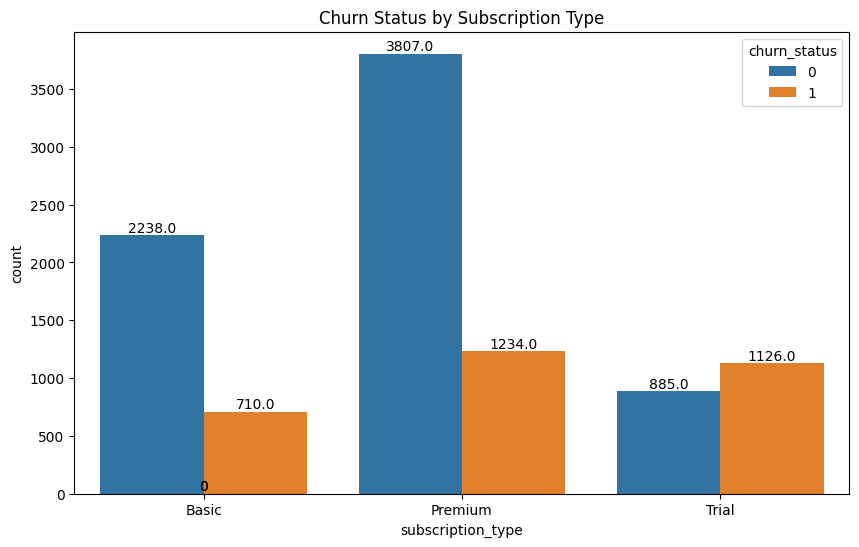

In [42]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=eda_churn_users, x='subscription_type', hue='churn_status')
plt.title('Churn Status by Subscription Type')

# Add value labels
print_values_on_bar_chart(ax)
plt.show()